https://syj9700.tistory.com/37

### 활성함수 사용이유

- 활성화 함수는 이전 층(layer)의 결과값을 변환하여 다른 층의 뉴런으로 신호를 전달하는 역할을 한다. 
- '활성화 함수가 필요한 이유는 모델의 복잡도를 올리기 위함인데 xor의 예와 같이 비선형 문제를 해결하는데 중요한 역할을 한다. 
- 비선형 문제를 해결하기 위해 단층 퍼셉트론을 쌓는 방법을 이용했는데 은닉층(hidden layer)를 무작정 쌓기만 한다고 해서 비선형 문제를 해결할 수 있는 것은 아니다. 
- 활성 함수를 사용하면 입력값에 대한 출력값이 비선형(nonlinear)적으로 나오므로 선형분류기를 비선형분류기로 만들 수 있다.


<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FuXKzr%2FbtqYvefgqNd%2FvI1T7FmXdO3pgpjhFAdRC0%2Fimg.png'>

신경망에서는 활성화 함수로 비선형 함수만을 사용하게 되는데 선형 함수를 사용하면 신경망의 층을 깊게 쌓는 것에 의미가 없어지기 때문이다. 즉, 은닉층(hidden layers)이 없는 네트워크로도 똑같은 기능을 할 수 있다.
예를 들어, 활성화 함수를 
h(x)=cx
라고 하자. 3층으로 구성된 네트워크라 할 때
y(x)=h(h(h(x)))=c∗c∗c∗x=c3∗x
이다. 이는 곧  y=ax에서 a=c3
인 선형 함수이며 1층으로 구성된 네트워크와 다를 바가 없어진다.

활성화 함수는 여러 종류가 있으며 종류에 따라서 신경망의 효율이 달라질 수 있다. 실제로 퍼셉트론은 임계값(이항하면 bias로 인식)을 경계로 출력이 바뀌는데 이는 계단함수를 활성화 함수로 사용하는 경우이다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbAJJjb%2FbtqYwg4UNvA%2FFg2J4CjSFwOxyUdqYx7VnK%2Fimg.png'>

신경망에서는 가중치를 학습시키는데 있어 미분을 사용해야했기 때문에(오차역전파법의 원리) 활성화 함수로 계단함수를 사용할 수 없었다(계단 함수는 미분이 불가능). 또한, 계단함수는 0/1과 같은 극단적인 값을 전달하기 때문에 데이터의 정보를 손실시켰다.

## sigmoid

https://icim.nims.re.kr/post/easyMath/64

https://m.blog.naver.com/je_un/222229440878

계단함수를 곡선의 형태로 변형시킨 형태의 시그모이드(sigmoid) 함수를 적용하게 되었다. 
시그모이드는 우리가 흔히 알고 있는 로지스틱(logistic) 함수이다.

계단함수와 비교해보면, 시그모이드 함수는 선이 매끄럽기 때문에 입력에 따라 연속적인 실수값을 출력하는데 입력이 중요하면 큰 값을, 중요하지 않으면 작은값을 출력한다. 이처럼 시그모이드 함수를 이용하면 계단함수보다 데이터의 정보를 보존할 수 있다. 

승산(유무비, odds)

예를 들어 간단하게 설명하면, 1이 나올 주사위 횟수 1회, 1이 나오지 않을 주사위 횟수 5회, 승산은 1:5가 된다.

조금 더 자세하게 설명하면, 동일 집단 내에서 어떤 사건이 발생할 확률과 발생하지 않을 확률의 비교값이다. 즉, 일어날 확률이 일어나지 않을 확률의 몇 배인가를 보여주는 수치이다. 

주사위를 던져 1이 나올 확률은 1/6이고, 나오지 않을 확률은 5/6 인 경우 승산은 (1/6)/(5/6)=1/5가 되어 0.2배가 된다.

기호로 표시하는 경우 아래와 같이 된다. 

P:확률
odds = P/(1-P)

승산비(유무비 비율, odds ratio) 
두 집단 간의 승산을 비교한 값이다.

log odds ==> logit( odds 에 자연로그를 씌운값)

<img src='https://stats.idre.ucla.edu/wp-content/uploads/2016/02/odds_r1.gif'>


<img src='https://mathworld.wolfram.com/images/eps-svg/LogitTransformation_1000.svg'>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
print( 2**2 )
print( 2**-2)
print( 2**3)
print( 2**-3)
print( math.e)

4
0.25
8
0.125
2.718281828459045


In [7]:
def sigmoid( z ):
    return 1/( 1+math.e**-z)

In [8]:
print( sigmoid( -10) )
print( sigmoid(-1))
print( sigmoid(0))
print( sigmoid(1))
print( sigmoid(10))

4.539786870243442e-05
0.2689414213699951
0.5
0.7310585786300049
0.9999546021312976


In [10]:
np.linspace( -10,10, 50)

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

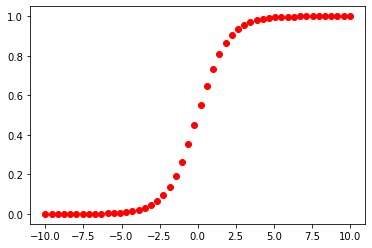

In [11]:
for z in np.linspace( -10,10, 50):
    s = sigmoid( z )
    plt.plot( z, s, 'ro')
plt.show()

Odds(p):= \frac{p}{1-p}

층이 많아질수록 오차역전파 수행시 기울기가 소실되는 문제가 발생한다

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FywvvY%2FbtqYB5u1Dt8%2F1aPsmOMh2d5Bku9FlAWRQ0%2Fimg.png'>

미분함수에 대해 x=0 에서 최대값(0.25)을 가지고, 입력값이 점점 작거나 커질수록 기울기가 거의 0에 수렴(saturation)하게 된다. 따라서, 가중치가 갱신이 되지 않으며 학습이 중단되게 된다.

## softmax

In [1]:
import numpy as np
import math

In [2]:
def fn(x):
    print( x/x.sum() )

In [6]:
def softmax( x ):
    e = np.exp( x)
    print( e )
    print("==============")
    print( e/e.sum() )

In [7]:
arr = np.array( [ 2.0, 1.0, 0.1 ] )
# fn( arr )
softmax( arr )

[7.3890561  2.71828183 1.10517092]
[0.65900114 0.24243297 0.09856589]


## relu
-  연산이 간결해서 학습 속도가 빠르며, 
-  vanishing gradient 문제의 해결
-  히든레이어에 주로 사용
- 그러나 음수의 값이 무조건 0으로 변환되어서 데이터 손실의 가능성이 있다.

In [13]:
def relu(x):
    return 0 if x<0 else x
#     return np.maximum(0, x)

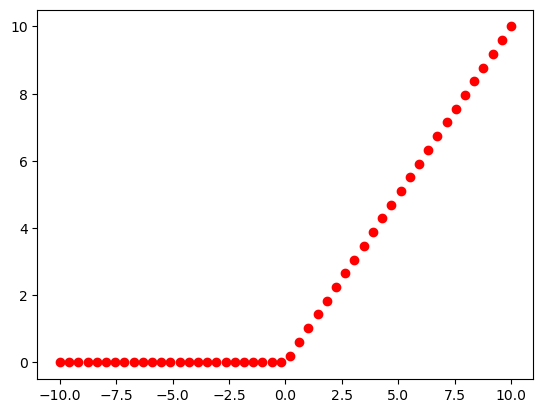

In [14]:
for z in np.linspace( -10,10, 50):
    s = relu( z )
    plt.plot( z, s, 'ro')
plt.show()

### leaky relu 
- Leaky ReLu는 ReLu 함수에서 음수 값에 대한 기울기가 0인 문제를 해결합니다.
- z가 음수일때 기울기가 0이 아닌 0.01을 갖게 하므로 ReLU보다 학습이 더 잘 된다.

In [20]:
def leakyRelu(x):
    return 0.01*x if x<0 else x
#     return np.maximum(0.01*x, x)

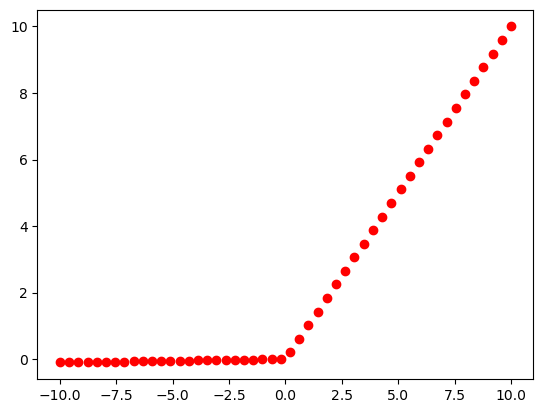

In [21]:
for z in np.linspace( -10,10, 50):
    s = leakyRelu( z )
    plt.plot( z, s, 'ro')
plt.show()

## tanh
- sigmoid의 vanishing gradient 문제는 여전히 남아있음
- 그러나 중심을 원점으로 옮김으로써 학습 과정이 sigmoid에 비해 최적화되었다고 할 수 있다.

In [22]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

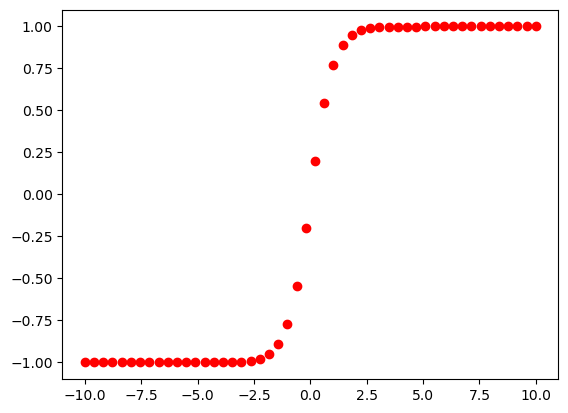

In [24]:
for z in np.linspace( -10,10, 50):
    s = tanh( z )
    plt.plot( z, s, 'ro')
plt.show()